<img src="OIP.jpg" />

# Loan Predication
## About Dataset
Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns. Problem----- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set. توقع قبول أو رفض طلب العملاء للحصول على القروض وفقا لمعايير البنك

# Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( 'ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

data = pd.read_csv(r'C:\Users\islam\OneDrive\Desktop\Work File\Machine Learning\Supervised ML_Classfication\Loan Prediction _Classification\train_u6lujuX_CVtuZ9i (1).csv')
data. head(11)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0   LP001002   Male      No          0      Graduate            No   
1   LP001003   Male     Yes          1      Graduate            No   
2   LP001005   Male     Yes          0      Graduate           Yes   
3   LP001006   Male     Yes          0  Not Graduate            No   
4   LP001008   Male      No          0      Graduate            No   
5   LP001011   Male     Yes          2      Graduate           Yes   
6   LP001013   Male     Yes          0  Not Graduate            No   
7   LP001014   Male     Yes         3+      Graduate            No   
8   LP001018   Male     Yes          2      Graduate            No   
9   LP001020   Male     Yes          1      Graduate            No   
10  LP001024   Male     Yes          2      Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0         NaN             360.0   
1              4583             1508.0       128.0             360.0   
2              3000                0.0        66.0             360.0   
3              2583             2358.0       120.0             360.0   
4              6000                0.0       141.0             360.0   
5              5417             4196.0       267.0             360.0   
6              2333             1516.0        95.0             360.0   
7              3036             2504.0       158.0             360.0   
8              4006             1526.0       168.0             360.0   
9             12841            10968.0       349.0             360.0   
10             3200              700.0        70.0             360.0   

    Credit_History Property_Area Loan_Status  
0              1.0         Urban           Y  
1              1.0         Rural           N  
2              1.0         Urban           Y  
3              1.0         Urban           Y  
4              1.0         Urban           Y  
5              1.0         Urban           Y  
6              1.0         Urban           Y  
7              0.0     Semiurban           N  
8              1.0         Urban           Y  
9              1.0     Semiurban           N  
10             1.0         Urban           Y

# EDA 

In [2]:
data.info()
print('shape of dataset :- ',data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
shape of dataset :-  (614, 13)



## Data Structure Analysis (DataFrame Summary):

### General summary

* Data type: pandas.core.frame.DataFrame and basic data structures in Python Pandas to represent tables.
* Number of records (rows): 614
* Number of columns: 13
* Memory size: 62.5+ KB
* Data dimensions: (614, 13)
### Description of columns

## Important notes

* There are some empty values in columns 1 (Gender), 2 (Married), 3 (Dependents), 5 (Self_Employed), 8 (LoanAmount), 9 (Loan_Amount_Term), and 10 (Credit_History). These null values should be handled appropriately during data analysis.
* Columns 0 (Loan_ID), 4 (Education), 11 (Property_Area), and 12 (Loan_Status) contain text data.
* Columns 6 (ApplicantIncome), 7 (CoapplicantIncome), 8 (LoanAmount), and 9 (Loan_Amount_Term) contain numeric data.
* Column 10 (Credit_History) contains numeric data of type float64, but it may be convenient to convert it to type int64 since it contains only the values 0 and 1.
### Next steps

## The analysis depends on your goal with the data. In general, the following steps are basic:

* Handling void values: Replace or delete void values as needed.
* Explore data: Understand the distribution and characteristics of data using descriptive statistics and graphs.
* Data processing: converting data into forms suitable for analysis, such as encoding text data into numerical values.
* Data Analysis: Applying statistical models and machine learning techniques to extract useful information from data.

In [3]:
data.describe().T

count         mean          std    min     25%     50%  \
ApplicantIncome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5   
CoapplicantIncome  614.0  1621.245798  2926.248369    0.0     0.0  1188.5   
LoanAmount         592.0   146.412162    85.587325    9.0   100.0   128.0   
Loan_Amount_Term   600.0   342.000000    65.120410   12.0   360.0   360.0   
Credit_History     564.0     0.842199     0.364878    0.0     1.0     1.0   

                       75%      max  
ApplicantIncome    5795.00  81000.0  
CoapplicantIncome  2297.25  41667.0  
LoanAmount          168.00    700.0  
Loan_Amount_Term    360.00    480.0  
Credit_History        1.00      1.0

### The table provides a statistical summary of five variables from a dataset of 614 cases (note):
* ApplicantIncome: The average monthly income of an applicant for a loan.
* CoapplicantIncome: The average monthly income of the joint applicant (if applicable).
* LoanAmount: The requested loan amount.
* Loan Term (Loan_Amount_Term): Loan term in months.
* Credit History (Credit_History): A numerical value that indicates the quality of the applicant's credit history.


#### Explanation of columns:

#### Analysis of the results:

## Applicant income:

* The applicant's average monthly income is $5,403.
* There is a high standard deviation ($2836) indicating high income variation among applicants.
* The lowest income is $109 while the highest income is $81,000.
* 25% of applicants have an income of less than $2,877 while 75% have an income of more than $3,812.

### Joint applicant's income:

* The average monthly income for a joint applicant is $1,621.

* There is a high standard deviation ($2926) indicating high income variation among joint applicants.
* The lowest income is $0 while the highest income is $6,667.
* 25% of joint applicants have an income of less than $0 while 75% have an income of more than $2,297.

### Loan amount:

* The average loan amount is $146,412.
* There is a high standard deviation ($121,628) indicating large variation in loan amounts.
* The lowest loan amount is $100 while the highest loan amount is $700,000.
* 25% of borrowers have loans of less than $59,000 while 75% have loans of more than $100,000.

### Loan term:
* All loan terms are 360 months (30 years).

### Credit history:

* 84.22% of cases have a perfect credit history (1).
* 15.78% of cases have a suboptimal credit history (less than 1).

In [4]:
# columns with data type "object" (Qualitative Data)
data.describe(include=['O'])

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422

## Explanation of columns:

* Loan_ID: A unique identifier for each loan.
* Gender: The gender of the applicant.
* Married: The applicant's marriage status.
* Dependents: The number of dependents on the applicant.
* Education: The applicant’s level of education.
* Self_Employed: Whether the applicant is self-employed.
* Property_Area: The area of the property to be purchased.
* Loan_Status: Loan status (approved or declined).
## Distinctive values:

* Loan_ID: Each loan has a unique ID.
* Gender: 2 categories: “Male” and “Female”.
* Married: 2 categories: “Yes” and “No”.
* Dependents: 3 categories: "0", "1" and "2".
* Education: 4 categories: “Graduate”, “Not Graduate”, “Doctorate” and “Others”.
* Self_Employed: 2 categories: “Yes” and “No”.
* Property_Area: 3 categories: "Urban", "Semiurban" and "Rural".
* Loan_Status: 2 categories: “Y” (accepted) and “N” (rejected).
## Distributions:

* Loan_ID: Uniform Distribution, where each loan has a unique identifier.
* Gender: 50.02% of applicants are male and 49.98% are female.
* Married: 63.85% of applicants are married and 36.15% are single.
* Dependents: 34.54% of applicants have no dependents, 48.05% have one dependent, and 17.41% have two dependents.
* Education: 50% of applicants have a university degree, 39.83% do not have a university degree, 7.96% have a doctorate, and 2.21% have other degrees.
* Self_Employed: 41.8% of applicants are self-employed and 58.2% work in traditional jobs.
* Property_Area: 38.92% of loans belong to properties in urban areas, 33.42% belong to properties in peri-urban areas, and 27.66% belong to properties in rural areas.
* Loan_Status: 64.44% of loans were approved and 35.56% were rejected.
## comments:

* These are just examples of data analysis.
* Analyzes may vary depending on the problem context and research questions.
* It is always important to interpret results in the context of the data and take into account all relevant factors.
## Next steps

## The analysis depends on your goal with the data. In general, the following steps are basic:

* Handling void values: Replace or delete void values as needed.
* Explore data: Understand the distribution and characteristics of data using descriptive statistics and graphs.
* Data processing: converting data into forms suitable for analysis, such as encoding text data into numerical values.
* Data Analysis: Applying statistical models and machine learning techniques to extract useful information from data.

# Data Cleaning 

In [5]:
null=data.isnull().sum()
null[null>0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [6]:
print('The Dataset contains', data.isna().sum().sum(), 
      'missing values and', data.duplicated().sum().sum(), 'duplicated values')

The Dataset contains 149 missing values and 0 duplicated values


In [7]:
class DataPreprocessor:
    def __init__(self, dataframe):
        self.df = dataframe

    def fillna_with_median(self, column_name):
        median_value = self.df[column_name].median()
        self.df[column_name].fillna(median_value, inplace=True)

    def fillna_with_mode(self, column_name):
        mode_value = self.df[column_name].mode().iloc[0]
        self.df[column_name].fillna(mode_value, inplace=True)


preprocessor = DataPreprocessor(data)

# Replace the empty values in the LoanAmount column with the most median (or mean) value
preprocessor.fillna_with_median("LoanAmount")

# Replace the empty values in the CoapplicantIncome column with the most median (or mean) value
preprocessor.fillna_with_median("CoapplicantIncome")


# Replace the empty values in the Loan_Amount_Term column with the most median (or mean) value
preprocessor.fillna_with_median("Loan_Amount_Term")

# Replace the empty values in the Credit_History column with the most median (or mean) value
preprocessor.fillna_with_median("Credit_History")

# Replace the empty values in the Gender column with the most frequent value
preprocessor.fillna_with_mode("Gender")

# Replace the empty values in the Married column with the most frequent value
preprocessor.fillna_with_mode("Married")

# Replace the empty values in the Dependents column with the most frequent value
preprocessor.fillna_with_mode("Dependents")

# Replace the empty values in the Self_Employed column with the most frequent value
preprocessor.fillna_with_mode("Self_Employed")



# Just Make Sure 
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
print('The Dataset contains', data.isna().sum().sum(), 
      'missing values and', data.duplicated().sum().sum(), 'duplicated values')

The Dataset contains 0 missing values and 0 duplicated values


We succeeded in overcoming the problem!! It is the process of cleaning the data and filling in the gaps in the data that may lead to distortion of the data and the inability of the model to predict. As they say, if you put in garbage, garbage will come out.

In [9]:
Loan = data
   
Loan.to_csv(r'C:\Users\islam\OneDrive\Desktop\Work File\Machine Learning\Supervised ML_Classfication\Loan Prediction _Classification\Loan.csv', index=False)

# EDA & Data Visualization 

### We would like to know the distribution of data and detect outliers and deal with them !!??

### Numirical Values

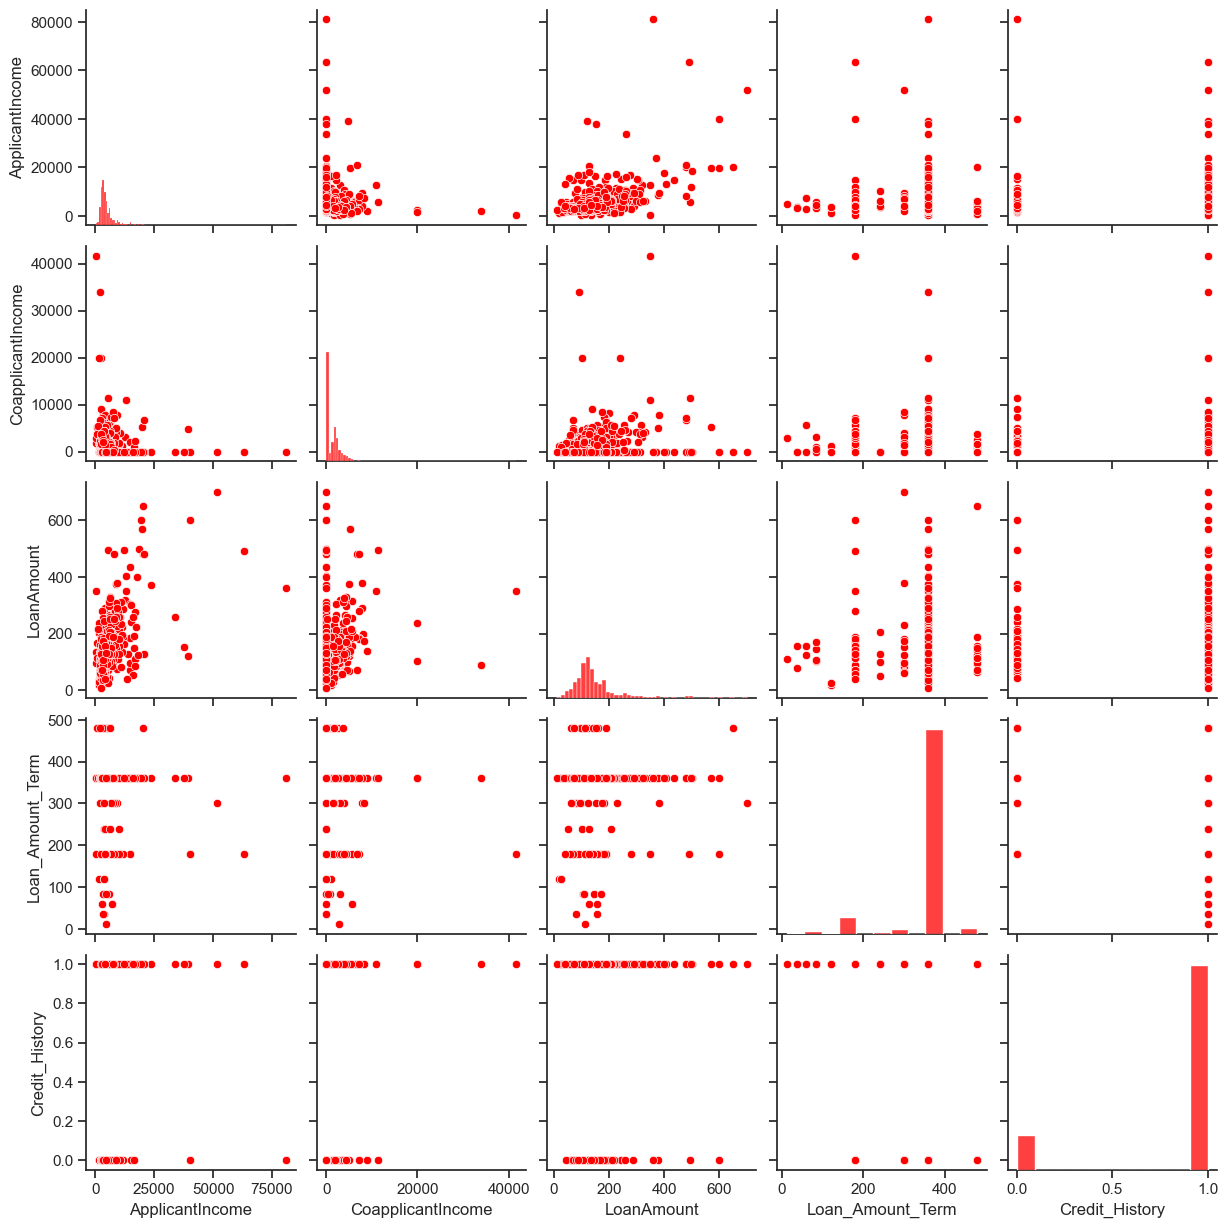

In [10]:
sns.set_theme(style="ticks")
custom_palette = ["#FF0000", "#FF4500", "#FF6347", "#FF7F50", "#FFA07A"]  # Example colors
sns.set_palette(custom_palette)

# Select the columns for the pairplot
df = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

# Create a pairplot
sns.pairplot(df)

# Show the plot
plt.show()

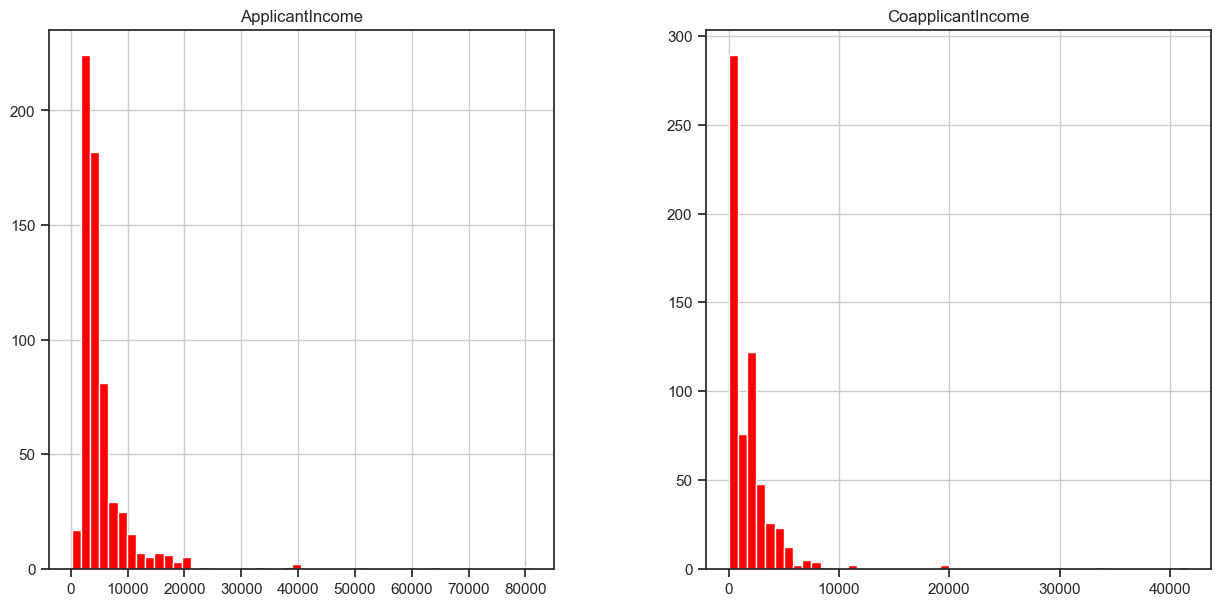

In [11]:
data[['ApplicantIncome', 'CoapplicantIncome',]].hist(bins=50,figsize=(15, 7),color='red')
plt.show()


### It is clear from the figure that the two columns are similar to each other from a distributional standpoint, as they are both skewed to the left, which means that the data is collected at the lowest values, and it is clear that there are outliers.

<Axes: >

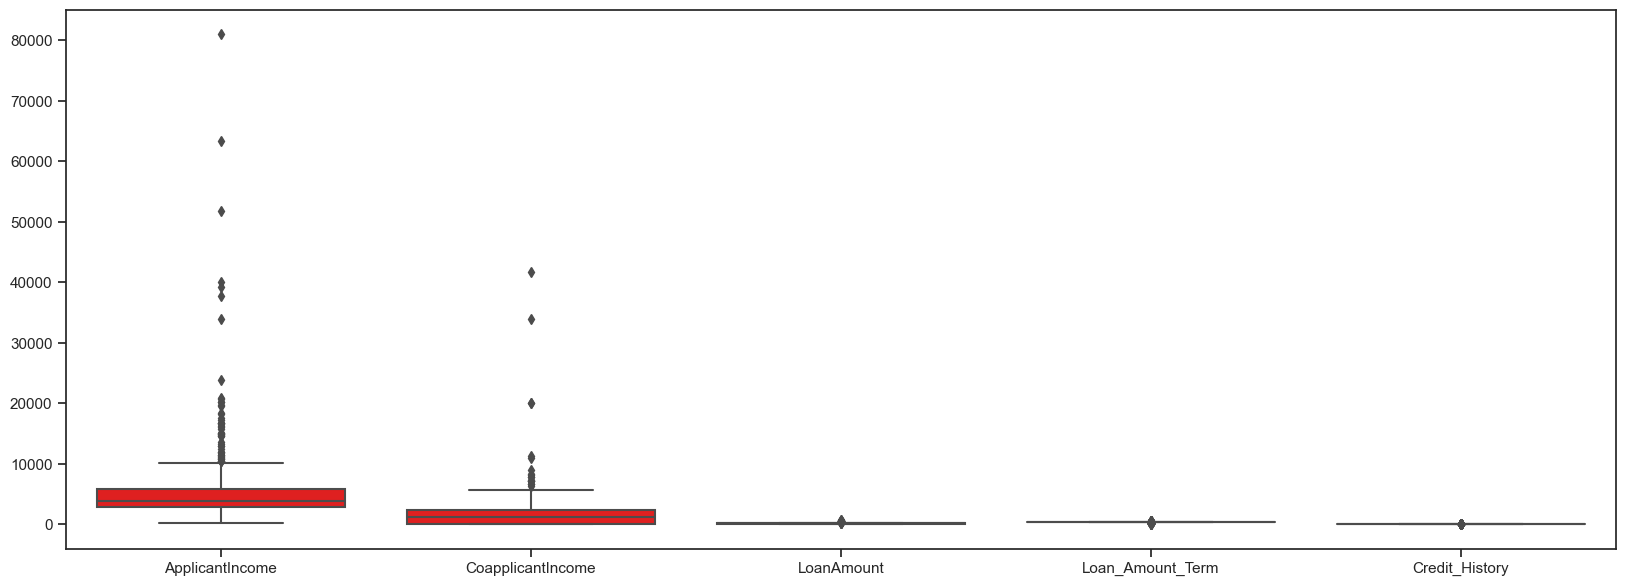

In [12]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data,color='red')

In [13]:
feature_name = "ApplicantIncome"

# احسب متوسط الميزة وانحرافها المعياري
mean_value = data[feature_name].mean()
std_dev = data[feature_name].std()

# حدد حدود القيم المتطرفة باستخدام z-score
z_score_threshold = 3  # يمكنك تعيين الحد الذي تريده هنا

# احسب z-score لكل قيمة في الميزة
z_scores = (data[feature_name] - mean_value) / std_dev

# حدد القيم المتطرفة
outliers = data[abs(z_scores) > z_score_threshold]

# قم بطباعة القيم المتطرفة
print("Outliers in", feature_name, ":", outliers.sum())

Outliers in ApplicantIncome : Loan_ID              LP001448LP001536LP001585LP001637LP001640LP0021...
Gender                                MaleMaleMaleMaleMaleMaleMaleMale
Married                                        YesYesYesYesYesYesYesNo
Dependents                                                3+3+3+1003+1
Education            GraduateGraduateGraduateGraduateGraduateGradua...
Self_Employed                                        NoNoNoNoYesNoNoNo
ApplicantIncome                                                 370614
CoapplicantIncome                                               4750.0
LoanAmount                                                      3052.0
Loan_Amount_Term                                                2460.0
Credit_History                                                     6.0
Property_Area        RuralSemiurbanUrbanSemiurbanSemiurbanUrbanRura...
Loan_Status                                                   YYYNYYNY
dtype: object


In [14]:
feature_name = "CoapplicantIncome"

# احسب متوسط الميزة وانحرافها المعياري
mean_value = data[feature_name].mean()
std_dev = data[feature_name].std()

# حدد حدود القيم المتطرفة باستخدام z-score
z_score_threshold = 3  # يمكنك تعيين الحد الذي تريده هنا

# احسب z-score لكل قيمة في الميزة
z_scores = (data[feature_name] - mean_value) / std_dev

# حدد القيم المتطرفة
outliers = data[abs(z_scores) > z_score_threshold]

# قم بطباعة القيم المتطرفة
print("Outliers in", feature_name, ":", outliers.sum())

Outliers in CoapplicantIncome : Loan_ID              LP001020LP001610LP002297LP002342LP002893LP002949
Gender                                     MaleMaleMaleMaleMaleFemale
Married                                               YesYesNoYesNoNo
Dependents                                                   13+0203+
Education            GraduateGraduateGraduateGraduateGraduateGraduate
Self_Employed                                           NoNoNoYesNoNo
ApplicantIncome                                                 24709
CoapplicantIncome                                            137772.0
LoanAmount                                                     1626.0
Loan_Amount_Term                                               1980.0
Credit_History                                                    5.0
Property_Area              SemiurbanSemiurbanSemiurbanUrbanUrbanUrban
Loan_Status                                                    NNYNNN
dtype: object


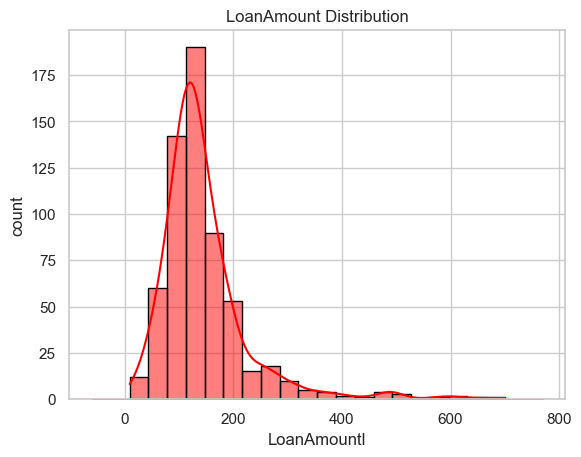

In [15]:
# Set the style and color palette
sns.set_theme(style="whitegrid")

# Create a histogram
sns.histplot(data=data, x='LoanAmount', bins=20, kde=True, color='red', edgecolor='black')

# Create a KDE plot
sns.kdeplot(data=data, x='LoanAmount', color='red', fill=True)

# Set labels and title
plt.xlabel('LoanAmountl')
plt.ylabel('count')
plt.title('LoanAmount Distribution')

# Show the plot
plt.show()

# It is clear that we have found many outliers, but we will turn towards them now 

### Catigrical Values

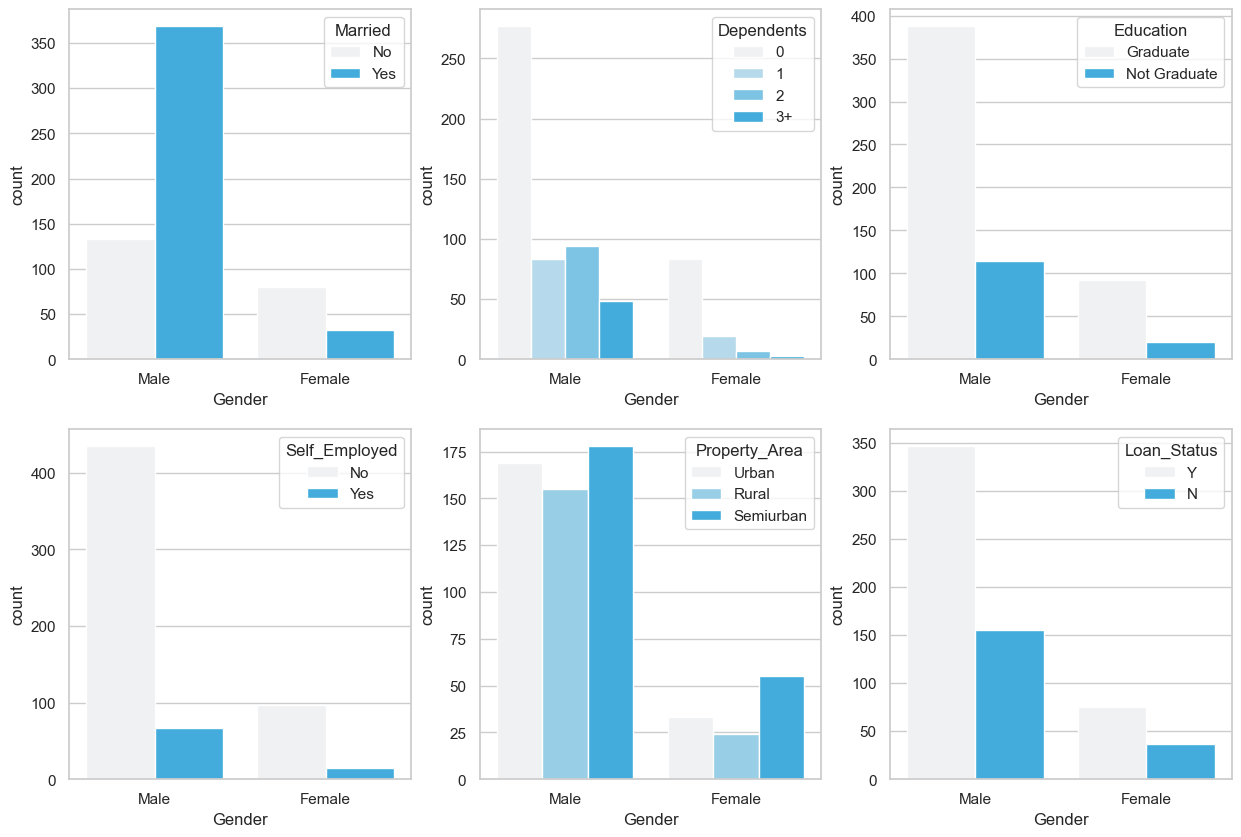

In [16]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
sns.countplot(x="Gender", hue="Married", color='#29b6f6',data=data, ax=ax[0,0])
sns.countplot(x="Gender", hue="Dependents", color='#29b6f6',data=data, ax=ax[0,1])
sns.countplot(x="Gender", hue="Education", color='#29b6f6',data=data, ax=ax[0,2])
sns.countplot(x="Gender", hue="Self_Employed",color='#29b6f6', data=data, ax=ax[1,0])
sns.countplot(x="Gender", hue="Property_Area",color='#29b6f6', data=data, ax=ax[1,1])
sns.countplot(x="Gender", hue="Loan_Status", color='#29b6f6',data=data, ax=ax[1,2])
fig.show()

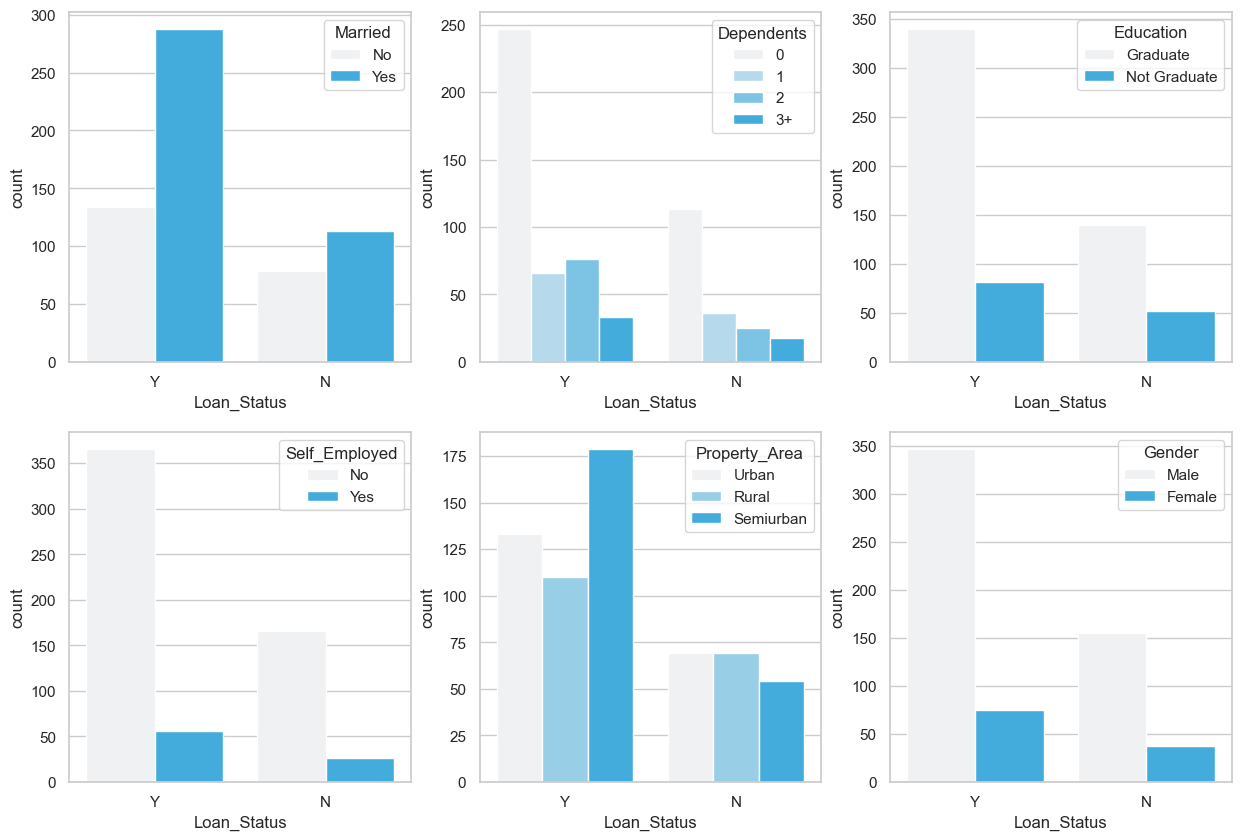

In [17]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
sns.countplot(x="Loan_Status", hue="Married", color='#29b6f6',data=data, ax=ax[0,0])
sns.countplot(x="Loan_Status", hue="Dependents", color='#29b6f6',data=data, ax=ax[0,1])
sns.countplot(x="Loan_Status", hue="Education", color='#29b6f6',data=data, ax=ax[0,2])
sns.countplot(x="Loan_Status", hue="Self_Employed",color='#29b6f6', data=data, ax=ax[1,0])
sns.countplot(x="Loan_Status", hue="Property_Area",color='#29b6f6', data=data, ax=ax[1,1])
sns.countplot(x="Loan_Status", hue="Gender", color='#29b6f6',data=data, ax=ax[1,2])
fig.show()

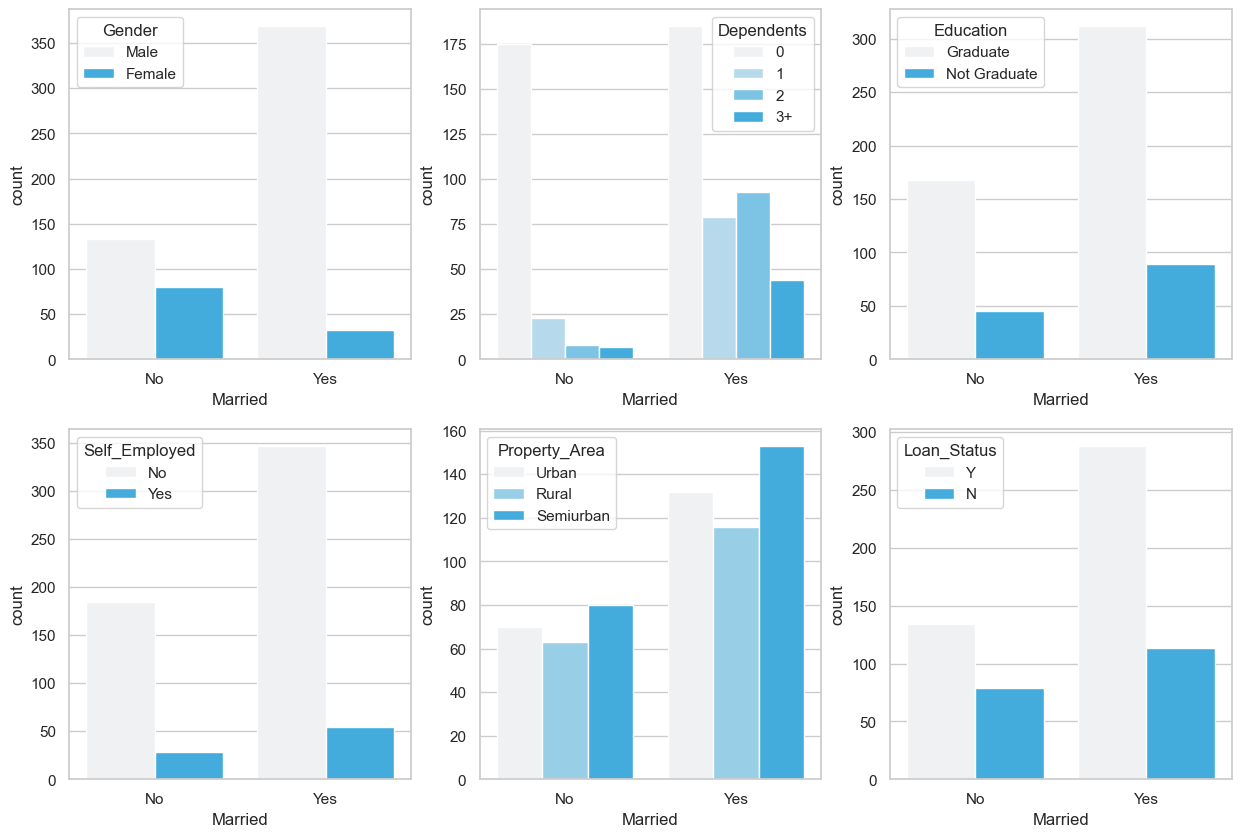

In [18]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
sns.countplot(x="Married", hue="Gender", color='#29b6f6',data=data, ax=ax[0,0])
sns.countplot(x="Married", hue="Dependents", color='#29b6f6',data=data, ax=ax[0,1])
sns.countplot(x="Married", hue="Education", color='#29b6f6',data=data, ax=ax[0,2])
sns.countplot(x="Married", hue="Self_Employed",color='#29b6f6', data=data, ax=ax[1,0])
sns.countplot(x="Married", hue="Property_Area",color='#29b6f6', data=data, ax=ax[1,1])
sns.countplot(x="Married", hue="Loan_Status", color='#29b6f6',data=data, ax=ax[1,2])
fig.show()

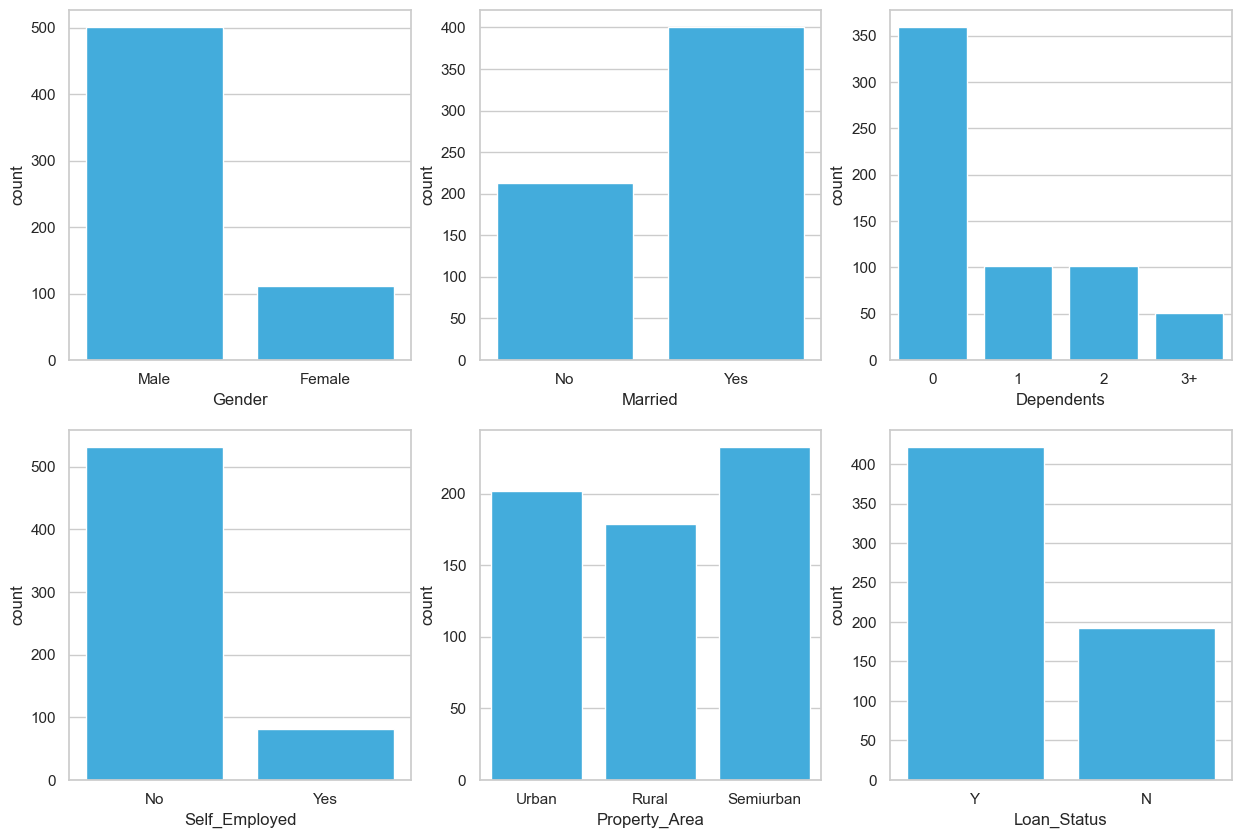

In [19]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
sns.countplot(x='Gender',data=data,color='#29b6f6', ax=ax[0,0])
sns.countplot(x='Married',data=data,color='#29b6f6', ax=ax[0,1])
sns.countplot(x='Dependents',data=data,color='#29b6f6', ax=ax[0,2])
sns.countplot(x='Self_Employed',data=data,color='#29b6f6', ax=ax[1,0])
sns.countplot(x='Property_Area',data=data,color='#29b6f6', ax=ax[1,1])
sns.countplot(x='Loan_Status',data=data,color='#29b6f6', ax=ax[1,2])
fig.show()


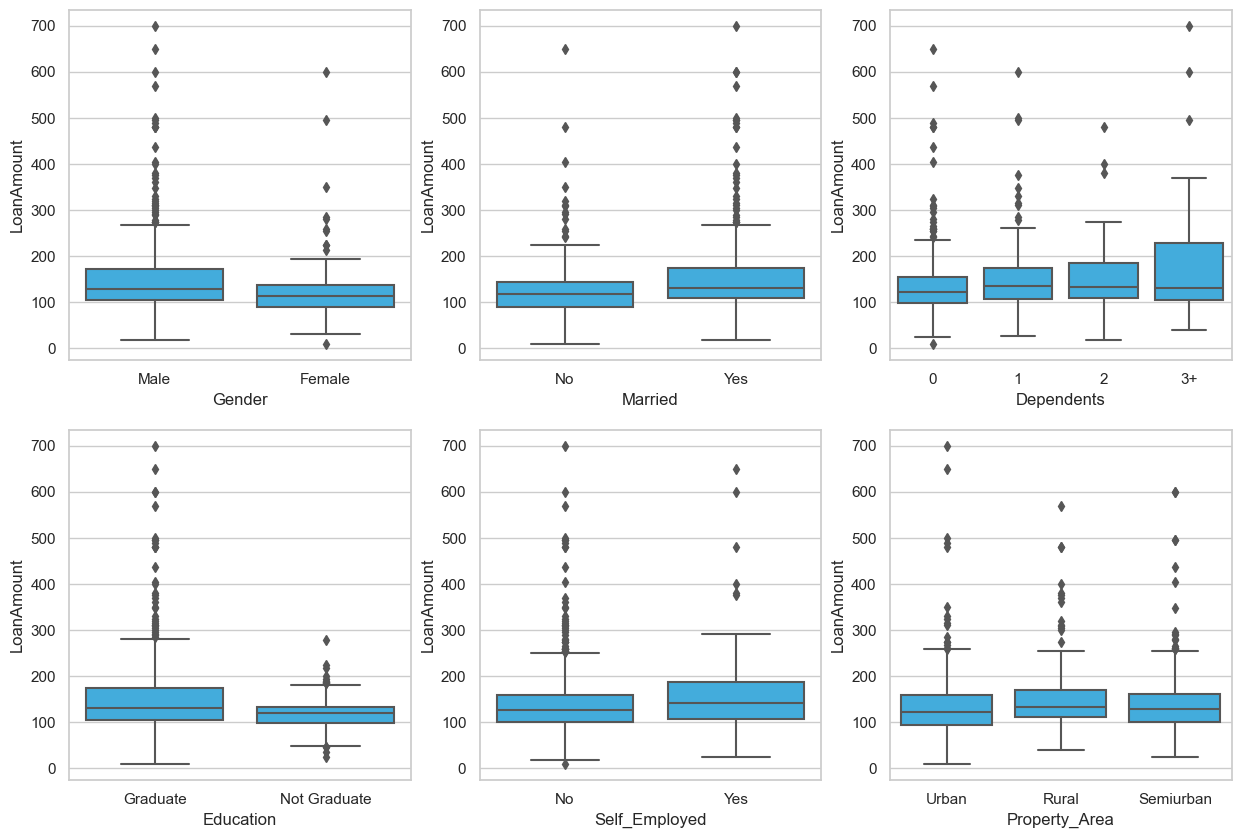

In [20]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
sns.boxplot(x='Gender',y='LoanAmount',data=data,color='#29b6f6', ax=ax[0,0])
sns.boxplot(x='Married',y='LoanAmount',data=data,color='#29b6f6', ax=ax[0,1])
sns.boxplot(x='Dependents',y='LoanAmount',data=data,color='#29b6f6', ax=ax[0,2])
sns.boxplot(x='Education',y='LoanAmount',data=data,color='#29b6f6', ax=ax[1,0])
sns.boxplot(x='Self_Employed',y='LoanAmount',data=data,color='#29b6f6', ax=ax[1,1])
sns.boxplot(x='Property_Area',y='LoanAmount',data=data,color='#29b6f6', ax=ax[1,2])
fig.show()

# Preprocessing & Preparing the data set for the training and testing process

## ------------------------------------------( Feature Engineering )--------------------------- 

###  Transform Data or Converting Categorical Data for Machine Learning
* LabelEncoder
* (or) One-Hot Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
data.Gender=la.fit_transform(data.Gender)
data.Married=la.fit_transform(data.Married)
data.Dependents=la.fit_transform(data.Dependents)
data.Education=la.fit_transform(data.Education)
data.Self_Employed=la.fit_transform(data.Self_Employed)
data.Property_Area=la.fit_transform(data.Property_Area)
data.Loan_Status=la.fit_transform(data.Loan_Status)

### Finding relationships between variables (that is, the strength of the relationships between the independent variables (features) and the dependent variable (Loan_Status))

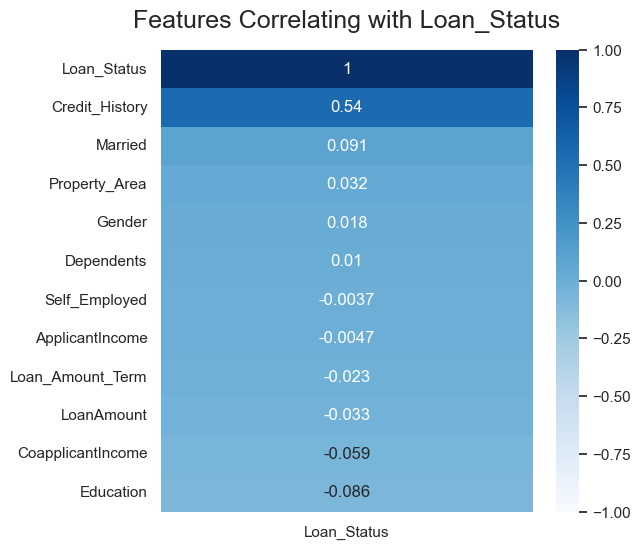

In [22]:
data_without_Loan_ID=data.drop(['Loan_ID'],axis=1)
correlation = data_without_Loan_ID.corr()  # Calculate correlations

# Sort features by correlation with 'Exited'
sorted_correlation = correlation[['Loan_Status']].sort_values(by='Loan_Status', ascending=False)

# Create the heatmap
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(sorted_correlation, vmin=-1, vmax=1, annot=True, cmap='Blues', annot_kws={"fontsize": 12})

# Set title and padding
heatmap.set_title('Features Correlating with Loan_Status', fontdict={'fontsize': 18}, pad=16)

# Display the heatmap
plt.show()

##  Write code to determine which features are most relevant to "Loan_Status":
# Features Selection 

In [23]:
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.svm import LinearSVC

class FeatureSelector:
    def __init__(self, data, target_column):
        self.data = data.drop(target_column, axis=1)
        self.target = data[target_column]

    def chi_squared_selection(self, alpha=0.05):
        chi2_scores = chi2(self.data, self.target)
        p_values = chi2_scores[1]
        sorted_features = np.argsort(p_values)
        selected_features = [self.data.columns[i] for i in sorted_features if p_values[i] < alpha]
        return selected_features

    def correlation_coefficient_selection(self, k=5):
        selector = SelectKBest(k=k)
        selector.fit(self.data, self.target)
        selected_features = [self.data.columns[i] for i in selector.get_support(indices=True)]
        return selected_features

    def recursive_feature_elimination_selection(self, n_features_to_select=5):
        estimator = LinearSVC()
        selector = RFE(estimator, n_features_to_select=n_features_to_select)
        selector.fit(self.data, self.target)
        selected_features_indices = selector.support_
        selected_features = self.data.columns[selected_features_indices]
        return selected_features

# Example Usage:
data_without_Loan_ID = data.drop(['Loan_ID'],axis=1)
loan_status_column = 'Loan_Status'

feature_selector = FeatureSelector(data_without_Loan_ID, loan_status_column)

# Method 1: Chi-squared test
selected_features_chi2 = feature_selector.chi_squared_selection()
print("Chi-squared selected features:", selected_features_chi2)
print ("\n")
# Method 2: Correlation coefficients
selected_features_corr = feature_selector.correlation_coefficient_selection()
print("Correlation coefficients selected features:", selected_features_corr)
print ("\n")
# Method 3: Recursive Feature Elimination (RFE)
selected_features_rfe = feature_selector.recursive_feature_elimination_selection()
print("RFE selected features:", selected_features_rfe)
print ("\n")
K = 4
cols = correlation.nlargest(K, 'Loan_Status')['Loan_Status'].index
print ('correlation.nlargest : ',cols)

Chi-squared selected features: ['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Credit_History']


Correlation coefficients selected features: ['Married', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']


RFE selected features: Index(['Gender', 'Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object')


correlation.nlargest :  Index(['Loan_Status', 'Credit_History', 'Married', 'Property_Area'], dtype='object')


In [24]:
#####  Create the "Sum Income" feature from "ApplicantIncome" and "CoapplicantIncome":
## "Total_Income"
#data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
#data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)
##data.head()

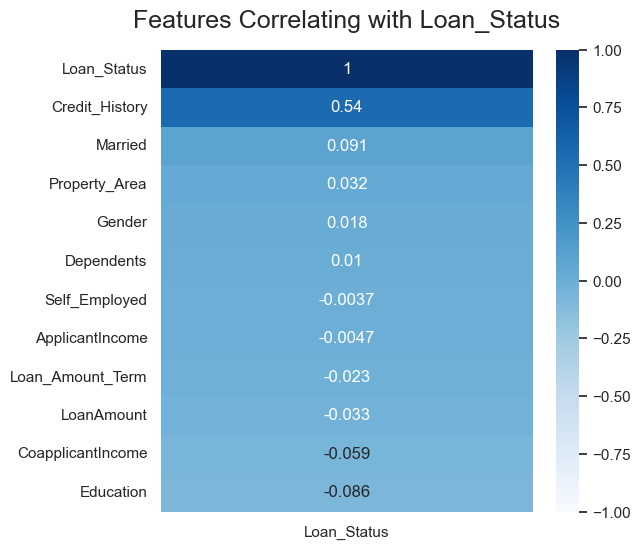

In [25]:
data_without_Loan_ID=data.drop(['Loan_ID'],axis=1)
correlation = data_without_Loan_ID.corr()  # Calculate correlations

# Sort features by correlation with 'Exited'
sorted_correlation = correlation[['Loan_Status']].sort_values(by='Loan_Status', ascending=False)

# Create the heatmap
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(sorted_correlation, vmin=-1, vmax=1, annot=True, cmap='Blues', annot_kws={"fontsize": 12})

# Set title and padding
heatmap.set_title('Features Correlating with Loan_Status', fontdict={'fontsize': 18}, pad=16)

# Display the heatmap
plt.show()

## Filtering using Variance Threshold

In [26]:
# Calculate variance for each column
variances = data_without_Loan_ID.var()

# Print the variances
print(variances)

Gender               1.493802e-01
Married              2.269317e-01
Dependents           1.019339e+00
Education            1.708902e-01
Self_Employed        1.159035e-01
ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.074027e+03
Loan_Amount_Term     4.151048e+03
Credit_History       1.241425e-01
Property_Area        6.201280e-01
Loan_Status          2.152707e-01
dtype: float64


## observations based on the output:

### Features with high variance:

* ApplicantIncome: This feature has the highest variance, indicating significant spread in income values among applicants.
* CoapplicantIncome: This feature also has high variance, suggesting a wide range of co-applicant income levels.
* LoanAmount: This feature shows high variance, implying a large variation in loan amounts.
* Total_Income: This feature combines applicant and co-applicant income, resulting in high variance.
### Features with medium variance:

* Dependents, Education, Loan_Amount_Term, Credit_History, and Property_Area exhibit moderate variance, suggesting some spread in the data but not as extreme as the high variance features.
### Features with low variance:

* Gender, Married, Self_Employed, and Loan_Status have relatively low variance, indicating less spread in the data for these features.

## We will not use this technique because of the disadvantages of filtering data using contrast thresholding:

* Missing useful information: This method may remove some useful features that have low variance but are associated with the results.
* Not taking into account relationships between properties: This method does not take into account possible relationships between different properties.

# Summary :
We have succeeded in converting categorical data to numerical or binary data, and we have created relationships between the independent variables and the dependent variable. We have found some features that have no relationship to the independent variable, so they will be excluded, such as (Education,Self_Employed ). We also found some problems, such as the high variance of some features, such as (ApplicantIncome,CoapplicantIncome, LoanAmount,Total_Income ). We have created a new feature that contains On the sum of (ApplicantIncome,CoapplicantIncome) and the two have a high variance, it is logical that their sum also has a high variance.
### But we have a problem, which is the presence of features that contain high variance and outliers!!??

In [27]:
## data.head(5) # first : The Full or orginal Datasets
## data_2.head(5) # second : The Best Corr with Loan_Status
#data_2 = data[['Credit_History', 'Married', 'LoanAmount', 'Property_Area', 'Gender','Loan_Status']] 
## Third : The Best Corr with Loan_Status  and add new feature
#data_3= data[['Credit_History', 'Married','Property_Area', 'Gender','Loan_Status','Total_Income']] 
## finaly 
data_4=data.drop(['Education','Loan_ID'],axis=1)

In [28]:
## 7- Transformation Pipelines

# 11- Normalization or (Feature Scaling) &Standardization

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

class DataProcessor:
    def __init__(self, data):
        self.data = data

    def standardize_data(self, columns_to_standardize):
        scaler = StandardScaler()
        self.data[columns_to_standardize] = scaler.fit_transform(self.data[columns_to_standardize])
        return self.data

    def normalize_data(self, columns_to_normalize):
        scaler = MinMaxScaler()
        self.data[columns_to_normalize] = scaler.fit_transform(self.data[columns_to_normalize])
        return self.data

# Example Usage:
# Assuming you have a DataFrame called 'df' with columns to be standardized and normalized
# You can replace this with your actual DataFrame and columns

# Create an instance of DataProcessor
data_processor = DataProcessor(data_4)

# Method 1: Standardization
columns_to_standardize = ['LoanAmount', 'Loan_Amount_Term']  # Replace with actual column names
df_standardized = data_processor.standardize_data(columns_to_standardize)
#print("Standardized Data:")
#print(df_standardized.sum())

# Method 2: Normalization
columns_to_normalize = ['Property_Area','CoapplicantIncome']  # Replace with actual column names
df_normalized = data_processor.normalize_data(columns_to_normalize)
#print("\nNormalized Data:")
#df_normalized.sum()


In [30]:
# Calculate variance for each column
variances = data_4.var()

# Print the variances
print(variances)

Gender               1.493802e-01
Married              2.269317e-01
Dependents           1.019339e+00
Self_Employed        1.159035e-01
ApplicantIncome      3.732039e+07
CoapplicantIncome    4.932168e-03
LoanAmount           1.001631e+00
Loan_Amount_Term     1.001631e+00
Credit_History       1.241425e-01
Property_Area        1.550320e-01
Loan_Status          2.152707e-01
dtype: float64


You can use the following examples to detect outliers (outliers) in a data set using the concept of standard deviation (Z-score) or using the relative standard deviation ratio (IQR). Outlier values are those that differ significantly from the rest of the values in the group.

In [31]:
from scipy.stats import zscore

z_scores = zscore(data_4)

threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)

print("Outliers using Z-score:")
print("Rows:", outliers[0].sum())
print("Columns:", outliers[1].sum())

Outliers using Z-score:
Rows: 13574
Columns: 236


In [32]:

Q1 = data_4.quantile(0.25)
Q3 = data_4.quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5
outliers = ((data_4 < (Q1 - threshold * IQR)) | (data_4 > (Q3 + threshold * IQR))).any(axis=1)

print("Outliers using IQR:")
data_4[outliers].sum()

Outliers using IQR:


Gender               2.400000e+02
Married              2.140000e+02
Dependents           3.100000e+02
Self_Employed        8.200000e+01
ApplicantIncome      2.279780e+06
CoapplicantIncome    1.398005e+01
LoanAmount           4.407659e+01
Loan_Amount_Term    -7.158660e+01
Credit_History       2.630000e+02
Property_Area        1.855000e+02
Loan_Status          2.060000e+02
dtype: float64

# Log Transformation

### Log Transformation LoanAmount

In [33]:
#from scipy.stats import norm
#from scipy import stats
#fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#
## Histogram
#sns.distplot(data_4['LoanAmount'], fit=norm,  ax=ax[0, 0])
#ax[0, 0].set_title('LoanAmount Distribution')
#
## Probability Plot
#stats.probplot(data_4['LoanAmount'], plot=ax[0, 1])
#ax[0, 1].set_title('Probability Plot')
#
## Applying log transformation
#data_4['LoanAmount'] = np.log(data_4['LoanAmount'])
#
## Transformed histogram
#sns.distplot(data_4['LoanAmount'], fit=norm, ax=ax[1, 0])
#ax[1, 0].set_title('Transformed LoanAmount Distribution')
#
## Transformed probability plot
#stats.probplot(data_4['LoanAmount'], plot=ax[1, 1])
#ax[1, 1].set_title('Transformed Probability Plot')
#
#plt.show()
#
#

### Log Transformation Loan_Amount_Term

In [34]:
#fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#
## Histogram
#sns.distplot(data_4['Loan_Amount_Term'], fit=norm,  ax=ax[0, 0])
#ax[0, 0].set_title('Loan_Amount_Term Distribution')
#
## Probability Plot
#stats.probplot(data_4['Loan_Amount_Term'], plot=ax[0, 1])
#ax[0, 1].set_title('Probability Plot')
#
## Applying log transformation
#data_4['Loan_Amount_Term'] = np.log(data_4['Loan_Amount_Term'])
#
## Transformed histogram
#sns.distplot(data_4['Loan_Amount_Term'], fit=norm, ax=ax[1, 0])
#ax[1, 0].set_title('Transformed Loan_Amount_Term Distribution')
#
## Transformed probability plot
#stats.probplot(data_4['Loan_Amount_Term'], plot=ax[1, 1])
#ax[1, 1].set_title('Transformed Probability Plot')
#
#plt.show()
#

### Log Transformation Total_Income

In [35]:
#fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#
## Histogram
#sns.distplot(data_4['Total_Income'], fit=norm,  ax=ax[0, 0])
#ax[0, 0].set_title('Total_Income Distribution')
#
## Probability Plot
#stats.probplot(data_4['Total_Income'], plot=ax[0, 1])
#ax[0, 1].set_title('Probability Plot')
#
## Applying log transformation
#data_4['Total_Income'] = np.log(data_4['Total_Income'])
#
## Transformed histogram
#sns.distplot(data_4['Total_Income'], fit=norm, ax=ax[1, 0])
#ax[1, 0].set_title('Transformed Total_Income Distribution')
#
## Transformed probability plot
#stats.probplot(data_4['Total_Income'], plot=ax[1, 1])
#ax[1, 1].set_title('Transformed Probability Plot')
#
#plt.show()
#

### Log Transformation ApplicantIncome

In [36]:
#fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#
## Histogram
#sns.distplot(data_4['ApplicantIncome'], fit=norm,  ax=ax[0, 0])
#ax[0, 0].set_title('ApplicantIncome Distribution')
#
## Probability Plot
#stats.probplot(data_4['ApplicantIncome'], plot=ax[0, 1])
#ax[0, 1].set_title('Probability Plot')
#
## Applying log transformation
#data_4['ApplicantIncome'] = np.log(data_4['ApplicantIncome'])
#
## Transformed histogram
#sns.distplot(data_4['ApplicantIncome'], fit=norm, ax=ax[1, 0])
#ax[1, 0].set_title('Transformed ApplicantIncome Distribution')
#
## Transformed probability plot
#stats.probplot(data_4['ApplicantIncome'], plot=ax[1, 1])
#ax[1, 1].set_title('Transformed Probability Plot')
#
#plt.show()
#
#

In [37]:
### Replace NaN values in 'CoapplicantIncome' with the mean
#mean_coapplicant_income = data_4['CoapplicantIncome'].median()
#data_4['CoapplicantIncome'].fillna(mean_coapplicant_income, inplace=True)
## Check for NaN values in 'CoapplicantIncome'
#nan_values_coapplicant = data_4['CoapplicantIncome'].isnull().sum()
#print("Number of NaN values in 'CoapplicantIncome':", nan_values_coapplicant)

### Log Transformation ApplicantIncome

In [38]:
#fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#
## Drop NaN values from 'CoapplicantIncome' column
#coapplicant_income_data = data_4['CoapplicantIncome'].dropna()
#
## Histogram
#sns.distplot(coapplicant_income_data, fit=norm, ax=ax[0, 0])
#ax[0, 0].set_title('CoapplicantIncome Distribution')
#
## Probability Plot
#stats.probplot(coapplicant_income_data, plot=ax[0, 1])
#ax[0, 1].set_title('Probability Plot')
#
## Applying log transformation, handling NaN values
#data_4['CoapplicantIncome'] = np.log1p(data_4['CoapplicantIncome'])
#
## Drop NaN values after log transformation
#transformed_coapplicant_income_data = data_4['CoapplicantIncome'].dropna()
#
## Transformed histogram
#sns.distplot(transformed_coapplicant_income_data, fit=norm, ax=ax[1, 0])
#ax[1, 0].set_title('Transformed CoapplicantIncome Distribution')
#
## Transformed probability plot
#stats.probplot(transformed_coapplicant_income_data, plot=ax[1, 1])
#ax[1, 1].set_title('Transformed Probability Plot')
#
#plt.show()
#

* Make sure the features you choose are relevant to "Loan_Status".
* Do not overuse feature engineering, as this may lead to "overfitting".

# Creat The Model Test 

In [39]:
x=data_4.drop(['Loan_Status'],axis=1)
y=data_4.Loan_Status

In [40]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=40,shuffle=True)
print(x.shape,X_train.shape,X_test.shape)

(614, 10) (552, 10) (62, 10)


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.impute import SimpleImputer

# إعداد معالج البيانات مع SimpleImputer
imputer = SimpleImputer(strategy='median')

# تعويض القيم المفقودة في X_train_scaled
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)
# حذف الصفوف التي تحتوي على NaN
data_4 = data_4.dropna()

## LogisticRegression

In [43]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training set
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy_LGR = accuracy_score(y_test, y_pred)
# Display the results
print(f"Accuracy: {accuracy_LGR:.2f}")

Accuracy: 0.85


# Support Vector Machines

In [44]:
# Initialize the Support Vector Machines model
svc_model = SVC()

# Train the model on the training set
svc_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy_svm:.2f}")

Accuracy: 0.85


# KNN

In [45]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors = 3)

# Train the model on the training set
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy_knn:.2f}")

Accuracy: 0.81


# Gaussian Naive Bayes

In [46]:
# Initialize the Gaussian Naive Bayes model
gaussian_model = GaussianNB()

# Train the model on the training set
gaussian_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gaussian_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy_gnb:.2f}")

Accuracy: 0.84


# Stochastic Gradient Descent

In [47]:
# Initialize the Stochastic Gradient Descent model
sgd_model = SGDClassifier()

# Train the model on the training set
sgd_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = sgd_model.predict(X_test_scaled)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy_sgd:.2f}")

Accuracy: 0.52


# Decision Tree

In [48]:
# Initialize the  Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, max_leaf_nodes=100)

# Train the model on the training set
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy_dt:.2f}")

#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt
#
## Convert Index to a list
#feature_names_list = X_train.columns.tolist()
#
## Plot the decision tree
#plt.figure(figsize=(15, 10))
#plot_tree(decision_tree, filled=True, feature_names=feature_names_list, class_names=['0', '1'], rounded=True)
#plt.title('Decision Tree Visualization')
#plt.show()
#

Accuracy: 0.81


# Optmizining Model !!

Accuracy: 0.95


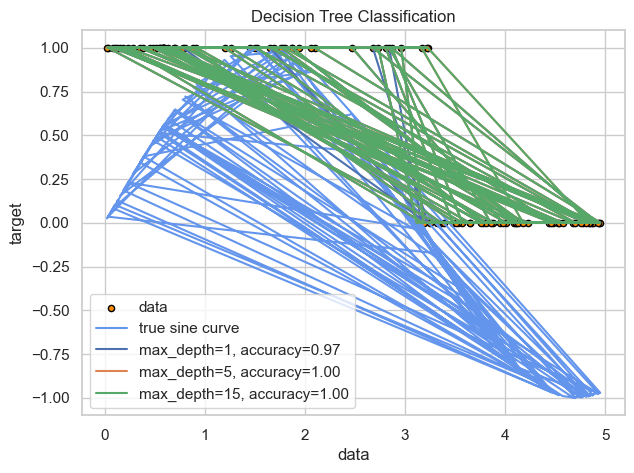

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class DecisionTreeModel:
    def __init__(self, max_depth=5, max_leaf_nodes=100):
        self.model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, y_true, y_pred):
        return accuracy_score(y_true, y_pred)

class SyntheticDataPlotter:
    def generate_sine_data(self, n_samples=80):
        rng = np.random.RandomState(42)
        X = np.sort(5 * rng.rand(n_samples, 1), axis=0)
        y = (np.sin(X).ravel() + rng.normal(0, 0.1, X.shape[0]) > 0).astype(int)
        return X, y

    def plot_decision_tree(self, X, y, model, max_depth_values=[1, 5, 15]):
        plt.figure(figsize=(7, 5))
        plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
        plt.plot(X, np.sin(X), color="cornflowerblue", label="true sine curve")

        for max_depth in max_depth_values:
            model.model.set_params(max_depth=max_depth)
            model.train(X, y)
            y_pred = model.predict(X)
            accuracy = model.evaluate(y, y_pred)

            plt.plot(X, y_pred, label=f"max_depth={max_depth}, accuracy={accuracy:.2f}")

        plt.xlabel("data")
        plt.ylabel("target")
        plt.title("Decision Tree Classification")
        plt.legend()
        plt.show()
# Usage
dt_model = DecisionTreeModel()
data_plotter = SyntheticDataPlotter()

# Generate synthetic data
X, y = data_plotter.generate_sine_data(n_samples=500)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
dt_model.train(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = dt_model.evaluate(y_test, y_pred)
print(f"Accuracy: {accuracy_dt:.2f}")

# Plot decision tree
data_plotter.plot_decision_tree(X_test, y_test, dt_model)


# --------------------------------------( Ensemple Learning )----------------------------

# 1- Bagging 

## Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier
# Initialize a base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Initialize the Bagging Classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the Bagging Classifier on the training set
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.2f}")

Bagging Classifier Accuracy: 0.95


## Random Forest

In [51]:
# Usage
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Assuming X and y are your feature matrix and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")


Accuracy: 0.94


# 2- Boosting 

## Ada Boosting 

In [52]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize a base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Initialize the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost Classifier on the training set
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy_adaboost:.2f}")

AdaBoost Classifier Accuracy: 0.94


## Griedian Boosting 

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Classifier on the training set
gradient_boosting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test)

# Evaluate the model
accuracy_gradient_boosting = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gradient_boosting:.2f}")


Gradient Boosting Classifier Accuracy: 0.94


## XGBoost

In [54]:
import xgboost as xgb
# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)

# Train the XGBoost Classifier on the training set
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2f}")


XGBoost Classifier Accuracy: 0.92


## CatBoost

In [55]:
from catboost import CatBoostClassifier

# Initialize the CatBoost Classifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, loss_function='Logloss', random_seed=42)

# Train the CatBoost Classifier on the training set
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy_catboost:.2f}")


0:	learn: 0.6177767	total: 142ms	remaining: 14.1s
1:	learn: 0.5594927	total: 143ms	remaining: 7.03s
2:	learn: 0.5050348	total: 144ms	remaining: 4.66s
3:	learn: 0.4587339	total: 145ms	remaining: 3.48s
4:	learn: 0.4151222	total: 146ms	remaining: 2.77s
5:	learn: 0.3826362	total: 146ms	remaining: 2.29s
6:	learn: 0.3516669	total: 147ms	remaining: 1.96s
7:	learn: 0.3240502	total: 148ms	remaining: 1.7s
8:	learn: 0.3011034	total: 149ms	remaining: 1.5s
9:	learn: 0.2812449	total: 150ms	remaining: 1.35s
10:	learn: 0.2613187	total: 150ms	remaining: 1.22s
11:	learn: 0.2425111	total: 151ms	remaining: 1.11s
12:	learn: 0.2267082	total: 152ms	remaining: 1.01s
13:	learn: 0.2119254	total: 152ms	remaining: 936ms
14:	learn: 0.1996830	total: 153ms	remaining: 867ms
15:	learn: 0.1887417	total: 154ms	remaining: 807ms
16:	learn: 0.1785487	total: 154ms	remaining: 754ms
17:	learn: 0.1695287	total: 155ms	remaining: 706ms
18:	learn: 0.1624992	total: 156ms	remaining: 664ms
19:	learn: 0.1552299	total: 157ms	remaining

In [56]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your feature matrix and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(probability=True, random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('random_forest', random_forest),
        ('gradient_boosting', gradient_boosting),
        ('svm_classifier', svm_classifier)
    ],
    voting='soft'  # 'hard' or 'soft' voting
)

# Train the Voting Classifier on the training set
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy_voting:.2f}")


Voting Classifier Accuracy: 0.94


## Stacking 

In [57]:
from sklearn.ensemble import StackingClassifier

# Initialize base classifiers
base_classifiers = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Initialize meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Initialize Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5
)

# Train the Stacking Classifier on the training set
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy_stacking:.2f}")


Stacking Classifier Accuracy: 0.94


In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
               'Naive Bayes',  
              'Stochastic Gradient Decent',  
              'Decision Tree'],
    
    'Accuracy': [accuracy_svm,
                 accuracy_knn,
                 accuracy_LGR, 
              
                 accuracy_gnb, 
                 
                 accuracy_sgd,
                 
                 accuracy_dt]})
models.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
5               Decision Tree  0.950000
0     Support Vector Machines  0.854839
2         Logistic Regression  0.854839
3                 Naive Bayes  0.838710
1                         KNN  0.806452
4  Stochastic Gradient Decent  0.516129

In [59]:
Ensemble_Models = pd.DataFrame({
    'Ensemble': ['Bagging', 
              'Random Forest', 'Ada Boosting',  
              'Griedian Boosting',  
              'XGBoost',
             'CatBoost'],
    
    'Accuracy': [accuracy_bagging,
                 
                  accuracy_rf,
               accuracy_adaboost, 
                 
                 accuracy_gradient_boosting,
                 
                 accuracy_xgb,
             accuracy_catboost]})
Ensemble_Models.sort_values(by='Accuracy', ascending=False)

Ensemble  Accuracy
5           CatBoost      0.96
0            Bagging      0.95
1      Random Forest      0.94
2       Ada Boosting      0.94
3  Griedian Boosting      0.94
4            XGBoost      0.92

In [60]:
#plt.figure(figsize=(20, 10))  
#
#sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
#sns.lineplot(x=models['Model'], y=models['Accuracy'])
#
## Add labels and title if needed
#plt.xlabel('Model')
#plt.ylabel('Accuracy')
#plt.title('Scores of Different Models')
#
#plt.show()
#

In [61]:
import plotly.express as px
fig = px.line(models, x="Model", y="Accuracy")
fig.show()

In [62]:
import plotly.express as px
fig = px.line(models, x="Model", y="Accuracy")
fig.show()
import plotly.express as px
fig = px.line(Ensemble_Models, x="Ensemble", y="Accuracy")
fig.show()

In [63]:
import plotly.express as px
fig = px.line(Ensemble_Models, x="Ensemble", y="Accuracy")
fig.show()

# Conduct best model elections and conduct model evaluation

In [64]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

class EnsembleClassifier:
    def __init__(self, classifiers, voting='soft'):
        self.classifiers = classifiers
        self.voting = voting
        self.ensemble_classifier = self._initialize_ensemble_classifier()

    def _initialize_ensemble_classifier(self):
        return VotingClassifier(estimators=self.classifiers, voting=self.voting)

    def train(self, X_train, y_train):
        self.ensemble_classifier.fit(X_train, y_train)

    def predict(self, X_test):
        return self.ensemble_classifier.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{self.__class__.__name__} Accuracy: {accuracy:.2f}")

class StackingEnsembleClassifier(EnsembleClassifier):
    def __init__(self, base_classifiers, meta_classifier):
        self.base_classifiers = base_classifiers
        self.meta_classifier = meta_classifier
        self.ensemble_classifier = self._initialize_stacking_classifier()

    def _initialize_stacking_classifier(self):
        return StackingClassifier(
            estimators=self.base_classifiers,
            final_estimator=self.meta_classifier,
            cv=5
        )

# Assuming X and y are your feature matrix and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
random_forest = ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
gradient_boosting = ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))
svm_classifier = ('svm_classifier', SVC(probability=True, random_state=42))

# Create and train Voting Classifier
voting_classifier = EnsembleClassifier([random_forest, gradient_boosting, svm_classifier], voting='soft')
voting_classifier.train(X_train, y_train)
voting_classifier.evaluate(X_test, y_test)

# Define base classifiers and meta-classifier
base_classifiers = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

meta_classifier = LogisticRegression(random_state=42)

# Create and train Stacking Classifier
stacking_classifier = StackingEnsembleClassifier(base_classifiers, meta_classifier)
stacking_classifier.train(X_train, y_train)
stacking_classifier.evaluate(X_test, y_test)


EnsembleClassifier Accuracy: 0.94
StackingEnsembleClassifier Accuracy: 0.94


* It is clear that the model Support Vector Machines ,Logistic Regression are the best model to predict “Loan_Status” in this case.


# Confusion Matrix

Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        45
           1       0.98      0.91      0.94        55

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Confusion Matrix:


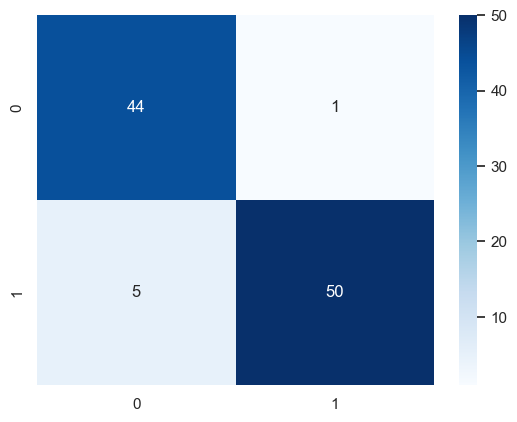

In [65]:
conf_matrix_RoandomForest = confusion_matrix(y_test, y_pred)
classification_rep_RoandomForest = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:")
print(classification_rep_RoandomForest)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix_RoandomForest,annot=True,fmt='.0f',cmap="Blues")
plt.show()

# The ROC Curve

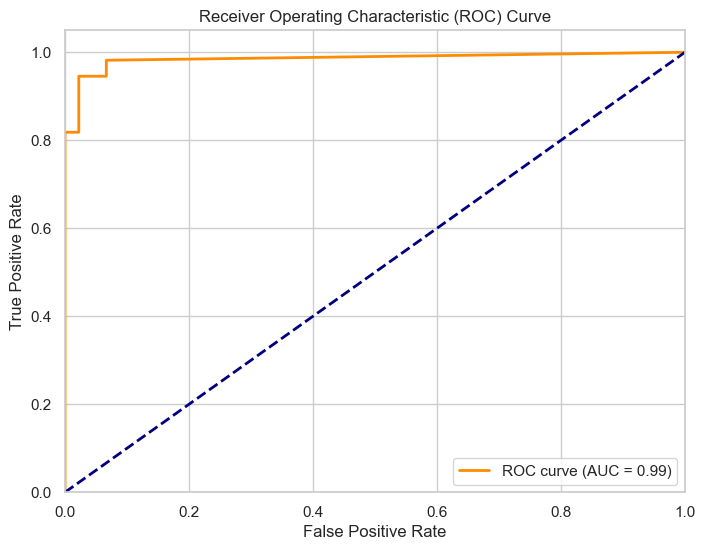

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your feature matrix and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train your classifier (Random Forest in this example)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# It is clear that the Logistic Regression algorithm performs best, so the vote will be in its favour  (85%)

## But we want to improve the performance of the algorithm, so I have collected some methods to discuss or try
* Increase the size of the data set because the data is too small
* The data contains many outliers that must be dealt with wisely
* Use some Feature Eng techniques such as Feature Selection  , Binning , Normlization (Feature Scaling) , Log Trans ..
* After the process of preparing the data, engineering the features, and dealing with deviations, outliers, or biases, the data became ready!! Now we enter into the second challenge, which is improving and adjusting the algorithms, whether using (Grid searchCv & randomseachCV) or adjusting the hyperparameter manually and using modern techniques such as (Ensemble Method)
* Keeping in mind that you should not overuse these techniques to avoid overfitting !!


# It is clear that the RandomForest algorithm performs best after improve the performance of the algorithm, so the vote will be in its favour (94%)

# Now the model is ready to enter the market

In [67]:
y_pred_rf

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [68]:
# Save the trained model
import pickle

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Save the model to a file
with open("model.pkl", 'wb') as f:
    pickle.dump(model, f)

# Load the saved model
with open("model.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions on the test set using the loaded model
y_pred_rf_loaded = loaded_model.predict(X_test)
# We make predictions on the test set using the loaded model (loaded_model).


In [69]:
# Predict the outcome
def predict_loan_outcome(y_pred_rf, X):
    try:
        prediction = y_pred_rf #model.predict(X)
        return prediction
    except Exception as e:
        return None, f"An error occurred: {e}"

# Example usage
features = [[1, 70000, 0, 0, 1, 150000, 70000, 100000, 360, 0, 0]]
prediction = predict_loan_outcome(y_pred_rf, features)

if prediction[0] == 0:
    print("According to our calculations, you will not get the loan from Bank.")
else:
    print("Congratulations!! you will get the loan from Bank.")

According to our calculations, you will not get the loan from Bank.
